# Explore here

In [146]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


url="https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv"

total_data = pd.read_csv(url)
total_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [147]:
total_data.shape

(48895, 16)

In [148]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [149]:
total_data.drop("host_name", axis = 1).duplicated().sum() #Indica duplicados en las columnas sacando id- host_id....

np.int64(0)

In [150]:
#total_data.drop(["id", "name", "host_id", "host_name", "last_review", "reviews_per_month"], axis=1, inplace=True) #imprime el dataset sin las columnas eliminadas
#print(total_data.head())
total_data.drop(["id", "name", "host_id", "host_name", "last_review", "reviews_per_month"], axis=1, inplace=True)
print(total_data.head())

  neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   
2           Manhattan        Harlem  40.80902  -73.94190     Private room   
3            Brooklyn  Clinton Hill  40.68514  -73.95976  Entire home/apt   
4           Manhattan   East Harlem  40.79851  -73.94399  Entire home/apt   

   price  minimum_nights  number_of_reviews  calculated_host_listings_count  \
0    149               1                  9                               6   
1    225               1                 45                               2   
2    150               3                  0                               1   
3     89               1                270                               1   
4     80              10                  9                               1   

   availability_365  
0               365  
1               35

In [151]:
total_data.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


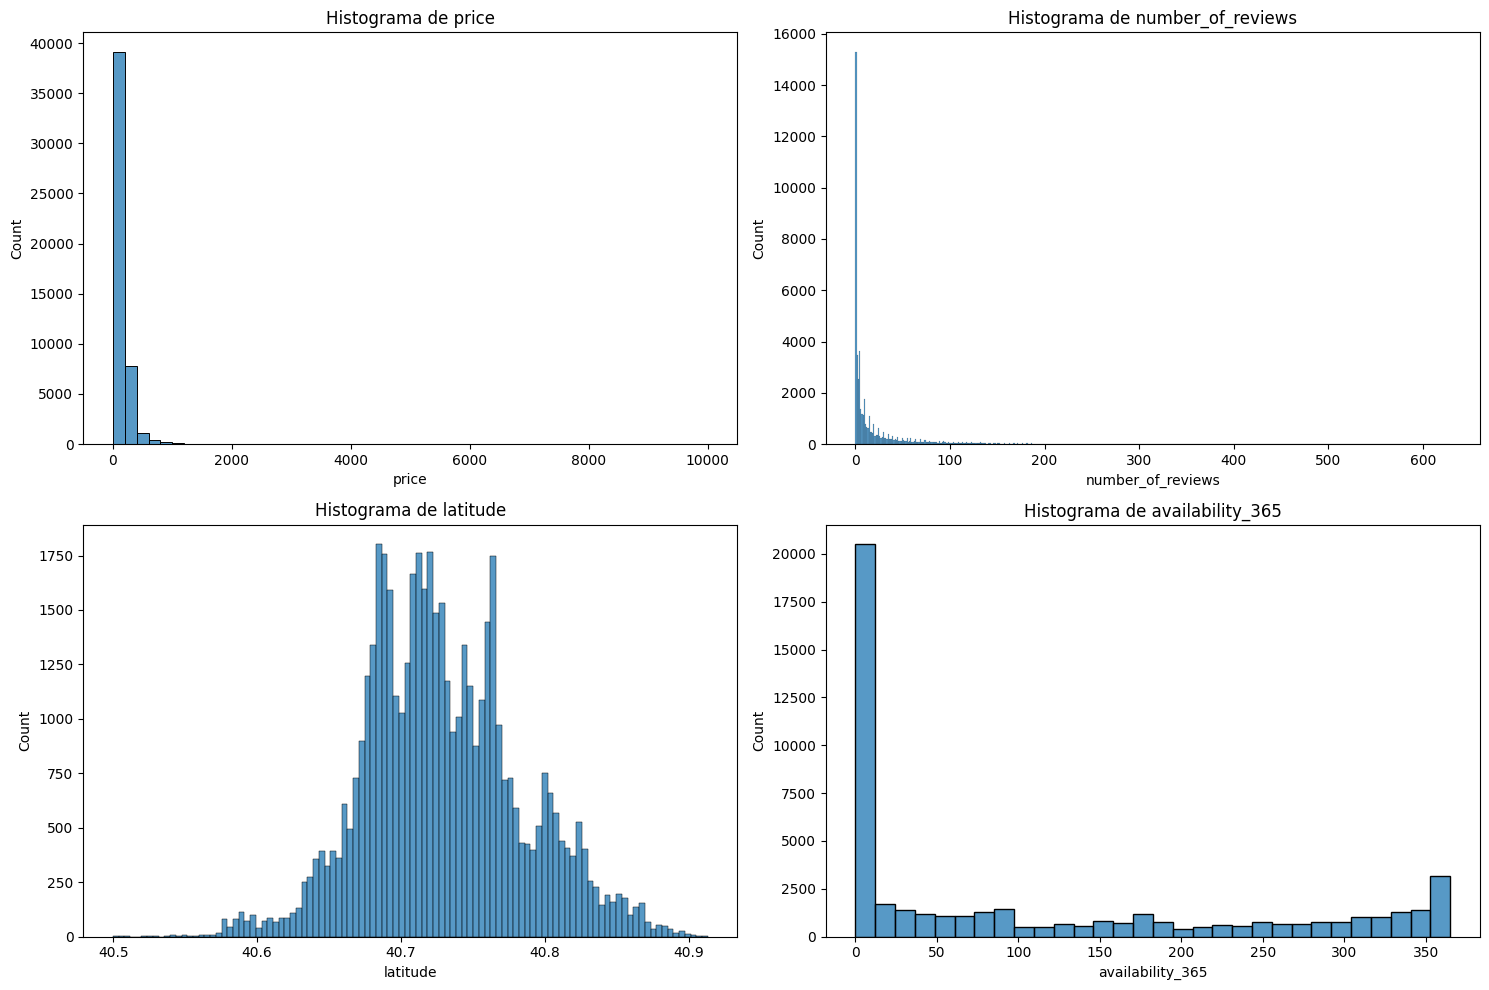

In [152]:
fig, axis = plt.subplots(2, 2, figsize=(15, 10))

# histograma de price
sns.histplot(ax=axis[0, 0], data=total_data, x="price", bins=50)
axis[0, 0].set_title('Histograma de price')

# Histograma de number_of_reviews
sns.histplot(ax=axis[0, 1], data=total_data, x="number_of_reviews")
axis[0, 1].set_title('Histograma de number_of_reviews')

# Histograma de availability_365
sns.histplot(ax=axis[1, 1], data=total_data, x="availability_365")
axis[1, 1].set_title('Histograma de availability_365')

# Histograma de latitude
sns.histplot(ax=axis[1, 0], data=total_data, x="latitude")
axis[1, 0].set_title('Histograma de latitude')

plt.tight_layout()
plt.show()

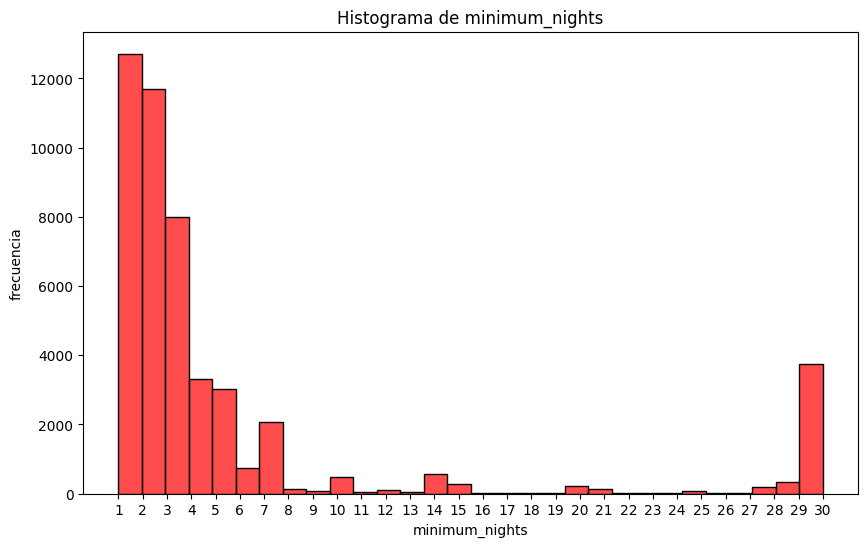

In [153]:
filtered_data =total_data[total_data['minimum_nights'] <= 30] # Filtrar para mostrar solo minimum_nights <= 30

plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_data, x="minimum_nights", bins=30, color='red', alpha=0.7)
plt.title('Histograma de minimum_nights')
plt.xlabel('minimum_nights')
plt.ylabel('frecuencia')
plt.xticks(range(1, 31))
plt.show()

Analisis de resultados:

1. price:
El histograma de precios muestra una concentración de alojamientos en el rango bajo (la mayoría por debajo de200 dolares), con cola larga hacia la derecha. Esto indica que la mayoría de los alojamientos son asequibles, pero existen algunos de lujo con precios mucho más altos.

2. number_of_reviews:
La mayoría de los anuncios tienen pocas reseñas, lo que sugiere que muchos listings son nuevos o poco populares. Sin embargo, hay algunos con muchas reseñas, lo que indica que ciertos alojamientos son muy populares o llevan mucho tiempo en la plataforma

3. availability_365:
El histograma de disponibilidad anual muestra que muchos alojamientos estan disponibles todo el año 

4. latitude:
La mayor concentración de estancias suele estar entre 40.7 y 40.8

5. La mayoría de los alojamientos en Airbnb NYC permiten estancias mínimas muy cortas, principalmente de 1, 2 o 3 noches

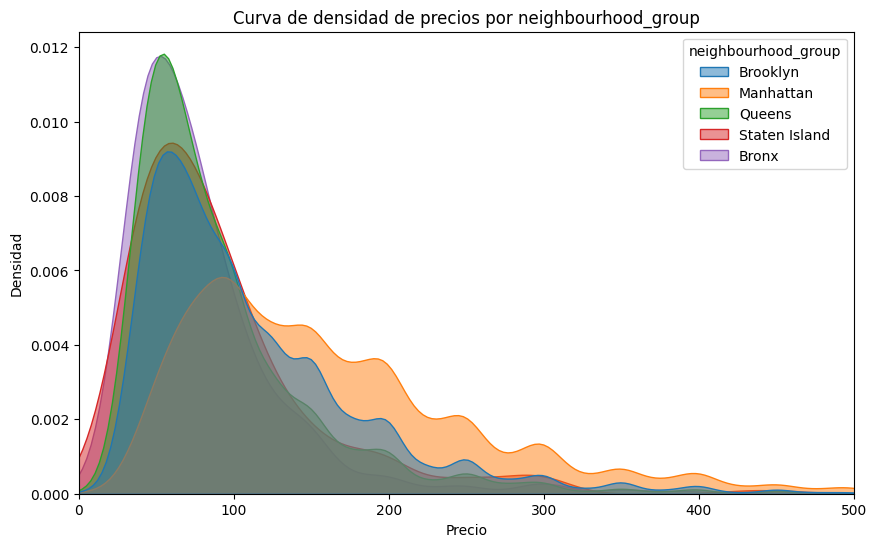

In [154]:
filtered_data = total_data[total_data['price'] < 500]

plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=filtered_data,
    x='price',
    hue='neighbourhood_group',
    fill=True,
    common_norm=False,
    alpha=0.5
)
plt.title('Curva de densidad de precios por neighbourhood_group')
plt.xlabel('Precio')
plt.ylabel('Densidad')
plt.xlim(0, 500)
plt.show()

#Analisis de resultados:
1. Manhattan es un Segmento de lujo y turismo premium, los precios de alquiler son altos 
2. Brooklyn de segunda opcion despues de Manhattan.
3. Bronx es la opcion mas economica para alquiler.
4. Queens/Staten Island son alternativas moderadas con respecto a los precios de alquileres.

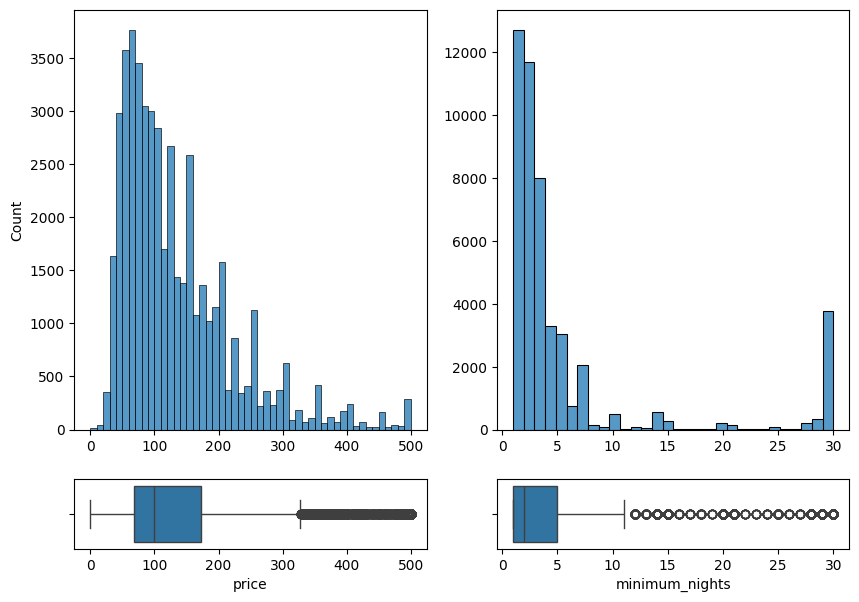

Estadísticas de price:
count    47851.000000
mean       131.530564
std         88.063220
min          0.000000
25%         68.000000
50%        100.000000
75%        172.000000
max        500.000000
Name: price, dtype: float64

Estadísticas de minimum_nights:
count    48148.000000
mean         5.579692
std          8.203838
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max         30.000000
Name: minimum_nights, dtype: float64


In [155]:
# muestra los subplot 2x 2 
fig, axis = plt.subplots(2, 2, figsize=(10, 7), gridspec_kw={'height_ratios': [6, 1]})

#Filtra los menores a 500 dolares
filtered_data = total_data[total_data['price'] <= 500]

# Creo una figura con histogramas y diagramas de caja
sns.histplot(ax=axis[0, 0], data=filtered_data, x="price", bins=50).set(xlabel=None)
sns.boxplot(ax=axis[1, 0], data=filtered_data, x="price")

# Filtrando los menores a 30
min_nights_filtered = total_data[total_data['minimum_nights'] <= 30]
sns.histplot(ax=axis[0, 1], data=min_nights_filtered, x="minimum_nights", bins=30).set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 1], data=min_nights_filtered, x="minimum_nights")

# Mostrar el plot
plt.show()

print("Estadísticas de price:")
print(filtered_data['price'].describe())
print("\nEstadísticas de minimum_nights:")
print(min_nights_filtered['minimum_nights'].describe())

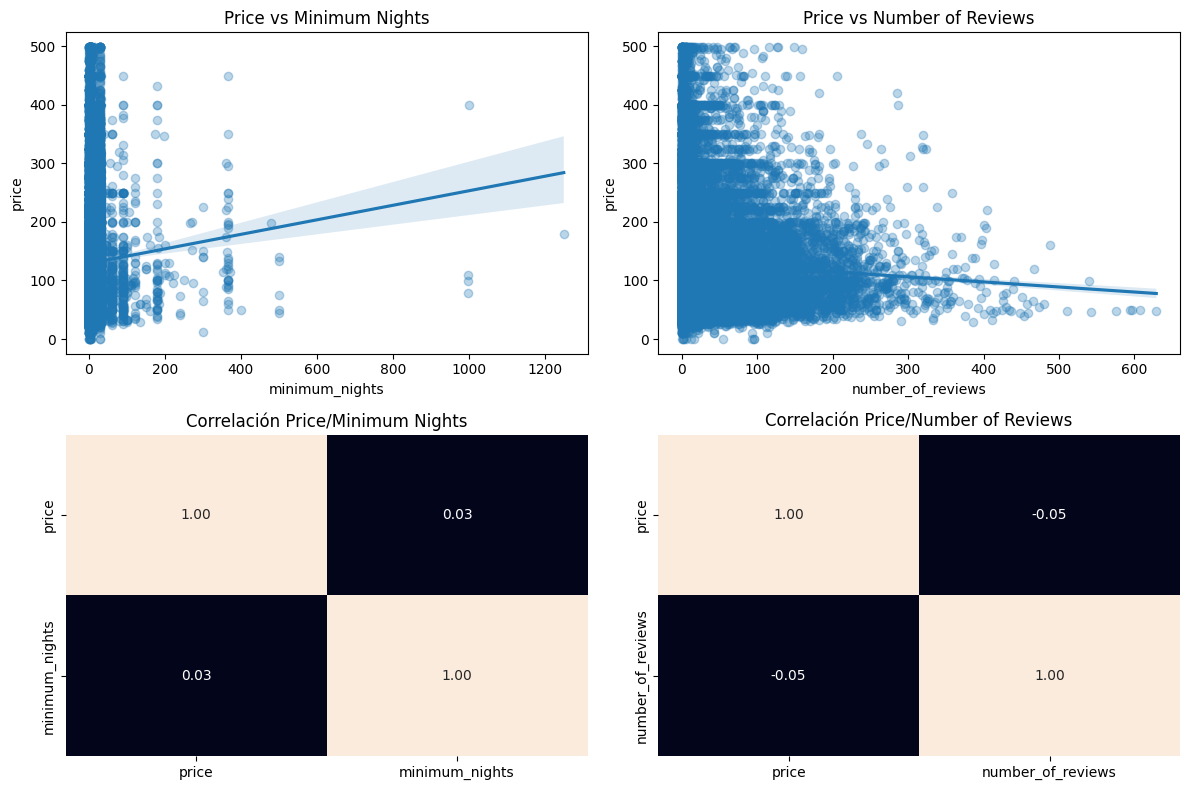

In [156]:
#ANALIS NUMERICO NUMERICO
# Filtrar precios extremos para mejor visualización
filtered_data = total_data[total_data['price'] < 500]

fig, axis = plt.subplots(2, 2, figsize=(12, 8))

# 1. price vs minimum_nights
sns.regplot(ax=axis[0, 0], data=filtered_data, x="minimum_nights", y="price", scatter_kws={'alpha':0.3})
axis[0, 0].set_title('Price vs Minimum Nights')
sns.heatmap(filtered_data[["price", "minimum_nights"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)
axis[1, 0].set_title('Correlación Price/Minimum Nights')

# 2. price vs number_of_reviews
sns.regplot(ax=axis[0, 1], data=filtered_data, x="number_of_reviews", y="price", scatter_kws={'alpha':0.3})
axis[0, 1].set_title('Price vs Number of Reviews')
sns.heatmap(filtered_data[["price", "number_of_reviews"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1], cbar=False)
axis[1, 1].set_title('Correlación Price/Number of Reviews')

plt.tight_layout()
plt.show()

#Analisis de resultados:

1. Price vs Minimum Nights
Diagrama de dispersión:
La mayoría de los alojamientos con precios bjos permiten estancias mínimas cortas 1-3 noches. A medida que aumenta el valor de minimum_nights, la dispersión de precios se mantiene, pero hay algunos outlyers con precios altos y estancias minimas largas
Mapa de calor de correlacion:
El coeficiente de correlación entre price y minimum_nights es cercano a 0,03 lo que confirma que no existe una relacion fuete entre ambas variables. exigir mas noches minimas no implica un precio mas alto
2. Price vs Number of Reviews
Diagrama de dispersión:
La mayoría de los alojamientos con muchos reviews tienen precios bajos o moderados. Los alojamientos con precios muy altos suelen tener pocos reviews, lo que sugiere que los alojamientos caros no son tan populares o llevan menos tiempo en la plataforma. No se observa una tendencia clara de que el precio aumente o disminuya con el número de reviews.
Mapa de calor de correlación:
El coeficiente de correlación entre price y number_of_reviews también es bajo cercano a 0, lo que indica que no hay una relación lineal significativa entre el precio y la cantidad de reseñas. Los alojamientos más populares no necesariamente son los más caros.

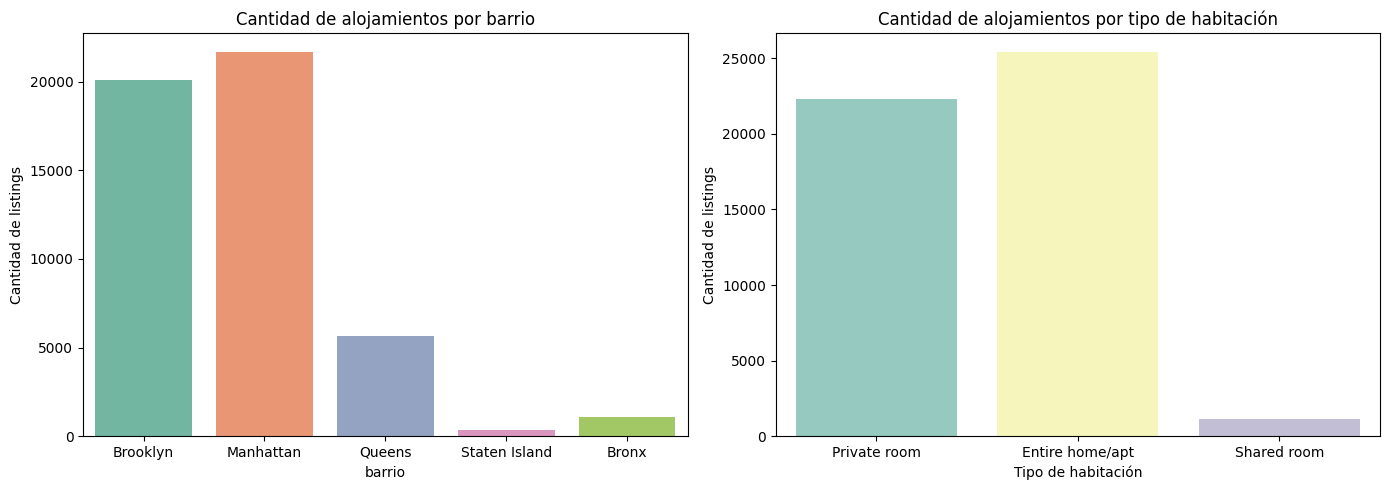

In [158]:
#ANALISIS CATEGORICO CATEGORICO 
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Barrios VS cantidad de listing
sns.countplot(ax=axes[0], data=total_data, x='neighbourhood_group', hue='neighbourhood_group', palette='Set2')
axes[0].set_title('Cantidad de alojamientos por barrio')
axes[0].set_xlabel('barrio')
axes[0].set_ylabel('Cantidad de listings')

# Tipo de habitación VS cantidad de listing
sns.countplot(ax=axes[1], data=total_data, x='room_type', hue='room_type', palette='Set3')
axes[1].set_title('Cantidad de alojamientos por tipo de habitación')
axes[1].set_xlabel('Tipo de habitación')
axes[1].set_ylabel('Cantidad de listings')

plt.tight_layout()
plt.show()


#Analisis de resultados:

1. Manhattan y Brooklyn son, los barios con mayor cantidad de alojamientos en Airbnb.
2. La mayoría de los alojamientos son de tipo "Entire home/apt" (casa o apartamento completo), lo que indica que muchos anfitriones ofrecen propiedades enteras en lugar de solo una habitación.
3. El segundo tipo más común es "Private room", que muestra que también hay una oferta significativa para quienes buscan compartir vivienda.
4. "Shared room" son mucho menos frecuentes, lo que indica que el alquiler para este tipo de alojamiento es baja

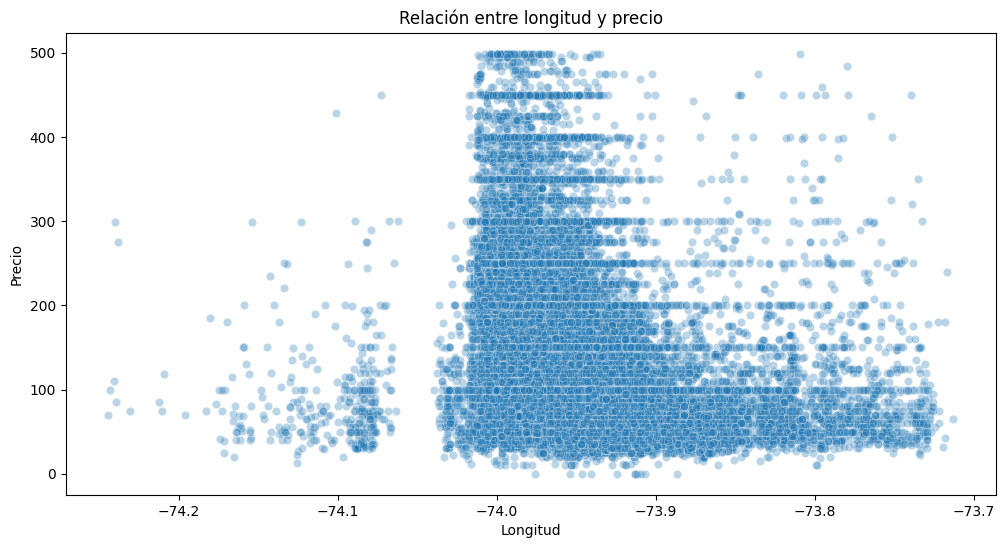

In [ ]:
#analisis multivariante 

# Filtrar precios extremos para mejor visualización
filtered_data = total_data[total_data['price'] < 500]

plt.figure(figsize=(12, 6))
sns.scatterplot(data=filtered_data, x='longitude', y='price', alpha=0.3)
plt.title('Relación entre longitud y precio')
plt.xlabel('Longitud')
plt.ylabel('Precio')
plt.show()



In [177]:
# Agrupar por neighbourhood_group y calcular estadísticas de longitude
#longitude_ranges = total_data.groupby('neighbourhood_group')
longitude_ranges=total_data.groupby('neighbourhood_group')['longitude'].agg(['min', 'max']).round(1)
longitude_ranges



,min,max
neighbourhood_group,,
Bronx,-73.9,-73.8
Brooklyn,-74.0,-73.9
Manhattan,-74.0,-73.9
Queens,-74.0,-73.7
Staten Island,-74.2,-74.1


#Analisis de resultados:

La ubicación geográfica (longitude) influye en el precio de los alojamientos, siendo las zonas centrales (especialmente Manhattan) las que concentran los precios mas altos, mientras que la periferia es mas economica.

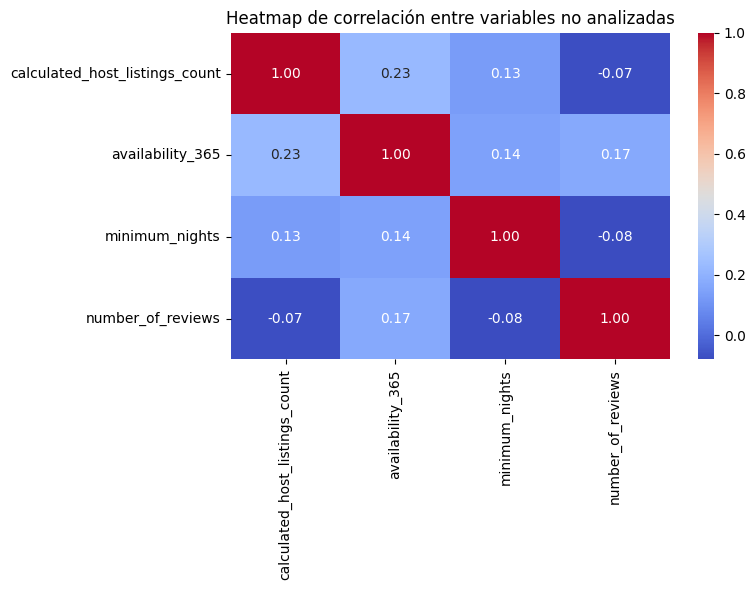

In [ ]:
# ANALISIS DE MATRIZ CORRELACIONES NUMERICO CATEGORICA

# Seleccionar variables no analizadas antes juntas
vars_to_analyze = [
    'calculated_host_listings_count',
    'availability_365',
    'minimum_nights',
    'number_of_reviews'
]

# Calcular la matriz de correlación
corr_matrix = total_data[vars_to_analyze].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap de correlación entre variables no analizadas')
plt.tight_layout()
plt.show()

#Analisis de resultados:

1. calculated_host_listings_count vs. otras variables:
Suele mostrar baja correlación con las demás variables. Esto indica que el número de alojamientos que tiene un host no está fuertemente relacionado ni con la disponibilidad, ni con el mínimo de noches, ni con el número de reseñas. Es decir, los “superhosts” no necesariamente tienen alojamientos más disponibles, con más reviews o con estancias mínimas más largas/cortas.
availability_365 y number_of_reviews:
Puede haber una correlación positiva moderada. Esto sugiere que los alojamientos que están disponibles más días al año tienden a recibir más reseñas, probablemente porque pueden ser reservados más veces.
minimum_nights y las demás variables:Suele mostrar correlación negativa con number_of_reviews y availability_365. Esto significa que los alojamientos que exigen estancias mínimas más largas suelen recibir menos reseñas y estar disponibles menos días (quizá porque se reservan por períodos largos o son menos atractivos para turistas de corta estancia).
number_of_reviews y las demás variables:
Suele tener correlación positiva con availability_365 y negativa con minimum_nights, como se explicó arriba.
Conclusión general:
No hay correlaciones extremadamente fuertes entre estas variables, pero sí algunos patrones interesantes:
Los alojamientos más disponibles suelen recibir más reviews.
Exigir estancias mínimas largas puede reducir la cantidad de reviews y la disponibilidad.
El número de listings por host no afecta mucho a las otras variables.

hACER DATASET CON Y SIN OUTLIER